In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
revenue = pd.read_csv(r'revenue.csv')
revenue.head(5)

,userID,configTag,installDate,platform,userCountry,media_source,day,rev,return
0,20aaaf2a-53ed-11ee-ad09-768d261d54b7,A,2023-09-15,android,ZA,Adwords,14,0.0,0
1,034f00c9-2bf8-11ed-a663-e6cce5d09abb,A,2023-09-16,android,PH,Adwords,1,0.0,0
2,45782923-c56a-11ec-80e3-8605195f39bf,B,2023-09-17,android,TH,Adwords,7,0.0,0
3,cc966021-5644-11ee-ad09-768d261d54b7,A,2023-09-18,android,MY,Adwords,14,0.0,0
4,f4b8d92f-5649-11ee-a806-ee3ae0d98fcd,A,2023-09-18,android,MY,Adwords,1,0.0,0


In [5]:
revenue_short = revenue[revenue['installDate'] >= '2023-09-18']
revenue.head(5)

,userID,configTag,installDate,platform,userCountry,media_source,day,rev,return
0,20aaaf2a-53ed-11ee-ad09-768d261d54b7,A,2023-09-15,android,ZA,Adwords,14,0.0,0
1,034f00c9-2bf8-11ed-a663-e6cce5d09abb,A,2023-09-16,android,PH,Adwords,1,0.0,0
2,45782923-c56a-11ec-80e3-8605195f39bf,B,2023-09-17,android,TH,Adwords,7,0.0,0
3,cc966021-5644-11ee-ad09-768d261d54b7,A,2023-09-18,android,MY,Adwords,14,0.0,0
4,f4b8d92f-5649-11ee-a806-ee3ae0d98fcd,A,2023-09-18,android,MY,Adwords,1,0.0,0


In [6]:
revenue_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415508 entries, 3 to 447375
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   userID        415508 non-null  object 
 1   configTag     415508 non-null  object 
 2   installDate   415508 non-null  object 
 3   platform      415508 non-null  object 
 4   userCountry   415312 non-null  object 
 5   media_source  415508 non-null  object 
 6   day           415508 non-null  int64  
 7   rev           415508 non-null  float64
 8   return        415508 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 31.7+ MB


In [7]:
Tier0 = ['US'] 
Tier1 = ['NO','AU','NZ','CH','FR','CA','JP','KR','DE','SE','UK','HK','FI','TW','NL','SG','SK','CN','AT','PT','ES', 'US']
Tier2 = ['GU','BH','HR','CY','GE','BG','SI','ME','DK','SA','AE','LV','LT','RO','IL','UA','MY','IE','CZ','BA','PL','IT','HU','EE']

In [9]:
revenue_short = revenue_short[revenue_short['platform'] == 'android']
revenue_short = revenue_short[revenue_short['media_source'] == 'Organic']
revenue_short = revenue_short[revenue_short['userCountry'].isin(Tier0 + Tier1)]
revenue_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30684 entries, 197571 to 447374
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userID        30684 non-null  object 
 1   configTag     30684 non-null  object 
 2   installDate   30684 non-null  object 
 3   platform      30684 non-null  object 
 4   userCountry   30684 non-null  object 
 5   media_source  30684 non-null  object 
 6   day           30684 non-null  int64  
 7   rev           30684 non-null  float64
 8   return        30684 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 2.3+ MB


In [10]:
revenue_short[(revenue_short['day'] == 1)]['rev'].sort_values().tail(20)

266365     27.545711
310393     28.612689
247316     29.555026
361259     32.004696
361946     32.468632
439250     34.112543
340860     34.643280
281919     36.870000
281920     36.870000
418083     37.930000
339318     39.820053
374889     43.373232
347749     43.970000
305818     47.359709
441597     60.960587
225083     61.538249
327903     63.950000
400376    110.040878
228402    168.146441
408524    222.900000
Name: rev, dtype: float64

In [11]:
revenue_short[(revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].sort_values().tail(20)

264746     25.123294
408882     25.657236
266365     27.545711
310393     28.612689
247316     29.555026
361259     32.004696
361946     32.468632
439250     34.112543
340860     34.643280
281920     36.870000
281919     36.870000
418083     37.930000
339318     39.820053
374889     43.373232
347749     43.970000
305818     47.359709
441597     60.960587
225083     61.538249
327903     63.950000
400376    110.040878
Name: rev, dtype: float64

In [12]:
revenue_short = revenue_short[revenue_short['userID'].isin(revenue_short[(revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['userID'])]

In [13]:
revenue_short[(revenue_short['day'] == 1)]['rev'].sort_values().tail(20)

264746     25.123294
408882     25.657236
266365     27.545711
310393     28.612689
247316     29.555026
361259     32.004696
361946     32.468632
439250     34.112543
340860     34.643280
281920     36.870000
281919     36.870000
418083     37.930000
339318     39.820053
374889     43.373232
347749     43.970000
305818     47.359709
441597     60.960587
225083     61.538249
327903     63.950000
400376    110.040878
Name: rev, dtype: float64

In [14]:
revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)].describe()

,day,rev,return
count,4453.0,4453.000000,4453.000000
mean,1.0,0.263416,0.271502
std,0.0,3.224003,0.444785
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.000000,1.000000
max,1.0,110.040878,1.000000


In [15]:
revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)].describe()

,day,rev,return
count,3216.0,3216.000000,3216.000000
mean,1.0,0.088469,0.251244
std,0.0,1.273456,0.433796
min,1.0,0.000000,0.000000
25%,1.0,0.000000,0.000000
50%,1.0,0.000000,0.000000
75%,1.0,0.000000,1.000000
max,1.0,32.468632,1.000000


In [16]:
revenue_short.groupby('configTag')['userID'].nunique()

configTag
A    3811
B    2880
Name: userID, dtype: int64

In [17]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries.round(decimals=2)

In [18]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

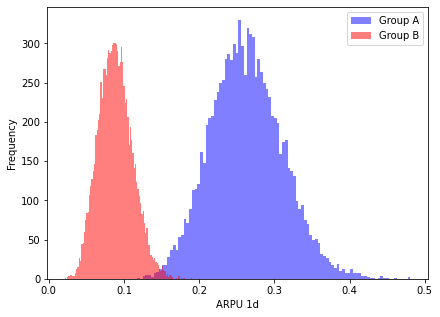

95% confidence interval for mean group A: [0.17 0.36]
95% confidence interval for mean group B: [0.05 0.14]


In [19]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 1d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [20]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 1) & (revenue_short['rev'] < 150)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=7211350.5, pvalue=0.0028544795417063187)

In [21]:
revenue_short[(revenue_short['day'] == 7)]['rev'].sort_values().tail(20)

384196     47.359709
273900     49.900000
198335     56.247139
385817     56.683948
200375     58.841340
213375     59.258562
253008     60.960587
374129     67.890000
218415     67.950000
414528     79.296088
284795     85.890000
205252     93.124329
329450    118.936170
249636    126.982151
403235    138.860000
324347    156.820000
218425    197.440000
218426    197.440000
282729    309.832583
437818    566.138989
Name: rev, dtype: float64

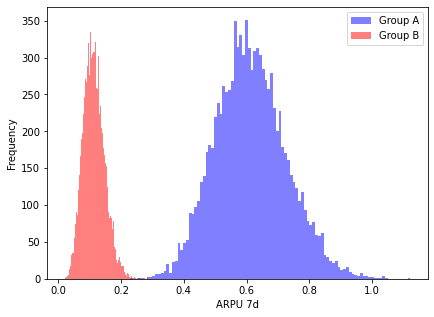

95% confidence interval for mean group A: [0.41 0.84]
95% confidence interval for mean group B: [0.05 0.19]


In [22]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 7d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [23]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 7) & (revenue_short['installDate'] <= '2023-10-02') & (revenue_short['rev'] < 300)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=3395066.0, pvalue=6.623281759210251e-05)

In [24]:
revenue_short[(revenue_short['day'] == 14)]['rev'].sort_values().tail(20)

333404     54.266611
319193     56.247139
370440     60.960587
371454     67.890000
197711     77.121750
405602     79.296088
210795     83.900000
327970     93.124329
382639    103.860000
202926    126.982151
407507    144.160066
297689    157.840000
332392    169.830000
285893    170.024548
218416    196.760000
331554    236.330000
331555    236.330000
229271    261.804847
309863    322.017382
406476    582.012551
Name: rev, dtype: float64

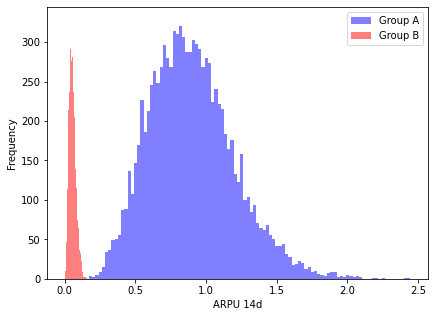

95% confidence interval for mean group A: [0.39 1.56]
95% confidence interval for mean group B: [0.01 0.11]


In [25]:
groupA_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, 10000)))
groupB_median_scores = list(map(np.mean, get_bootstrap_samples(revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, 10000)))

pylab.figure(figsize(15, 5))
pylab.subplot(1,2,1)
pylab.hist(groupA_median_scores, alpha = .5, color = 'b', label = 'Group A', bins = 100)
pylab.legend()

pylab.subplot(1,2,1)
pylab.hist(groupB_median_scores, alpha = .5, color = 'r', label = 'Group B', bins = 100)
pylab.legend()

# pylab.subplot(1,2,1)
# pylab.hist(groupC_median_scores, alpha = .5, color = 'g', label = 'Group C ARPU 1d', bins = 100)
# pylab.legend()

pylab.ylabel('Frequency') 
pylab.xlabel('ARPU 14d') 
pylab.show()

print("95% confidence interval for mean group A:",  stat_intervals(groupA_median_scores, 0.05))
print("95% confidence interval for mean group B:",  stat_intervals(groupB_median_scores, 0.05))

In [26]:
scipy.stats.mannwhitneyu(revenue_short[(revenue_short['configTag'] == 'A') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, revenue_short[(revenue_short['configTag'] == 'B') & (revenue_short['day'] == 14) & (revenue_short['installDate'] <= '2023-09-25') & (revenue_short['rev'] < 350)]['rev'].values, use_continuity=True, alternative='greater')

MannwhitneyuResult(statistic=921475.5, pvalue=3.604897653092577e-05)